#Uber Supply-Demand Gap case study


#Import and read the Uber database. Store it in a variable called `Uber`.

In [3]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
uber = pd.read_csv("Uber Request Data.csv")
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# Write your code for inspection here
print(uber.columns)
print(uber.shape)
print(uber.dtypes)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')
(6745, 6)
Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object


In [ ]:
##  Data Cleaning

In [5]:
# Check duplicate data
import numpy as np
import pandas as pd
uber['Request id'].nunique()
# All Request IDs are unique there are no duplicate rows


6745

In [6]:
# Check NA values
uber.isnull().sum()
## Here Drop timestamp and Driver id has null values in the columns

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
# Check formats for date and time for inconsistency
# Convert date and time with mixed formats
uber['Request timestamp'] = uber['Request timestamp'].str.replace("-","/")
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace("-","/")
uber['Request timestamp'] = uber['Request timestamp'].apply(lambda x: x+ ':00' if x.count(':')==1 else x)
uber['Drop timestamp'] = uber['Drop timestamp'].dropna().apply(lambda x: x+ ':00' if x.count(':')==1 else x)

uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], format = '%d/%m/%Y %H:%M:%S')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], format = '%d/%m/%Y %H:%M:%S')
uber


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [8]:
# HOURLY AND DAY WISE TREND ANALYSIS 
# ASSUMPTION IS WHEN CITY IS THE PICKUP POINT THE DROP OFF IS AIRPORT AND VICE VERSA
# Extract Day of week and add it as an additional column to the main data set
uber['Rday'] = uber['Request timestamp'].dt.weekday_name
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Rday
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Wednesday
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Thursday
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Friday
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Friday
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Monday


In [9]:
# Extract Hours  for hourly Analysis
uber['Hours'] = uber['Request timestamp'].dt.hour
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Rday,Hours
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Wednesday,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Thursday,6
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Friday,5
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Friday,17
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Monday,6


In [10]:
#Adding Timeslots column to the data set based on the hour of the day
 
uber['time_slots']  = ' '
uber.loc[uber['Hours'].between(0,4, inclusive=True),'time_slots'] = 'Mid Night'
uber.loc[uber['Hours'].between(4,8, inclusive=True),'time_slots'] = 'Early Morning'
uber.loc[uber['Hours'].between(8,12, inclusive=True),'time_slots'] = 'Morning'
uber.loc[uber['Hours'].between(12,16, inclusive=True),'time_slots'] = 'Afternoon'
uber.loc[uber['Hours'].between(16,20, inclusive=True),'time_slots'] = 'Evening'
uber.loc[uber['Hours'].between(20,24, inclusive=True),'time_slots'] = 'Night'
uber


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Rday,Hours,time_slots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Wednesday,21,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Thursday,6,Early Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Friday,5,Early Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Friday,17,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Monday,6,Early Morning


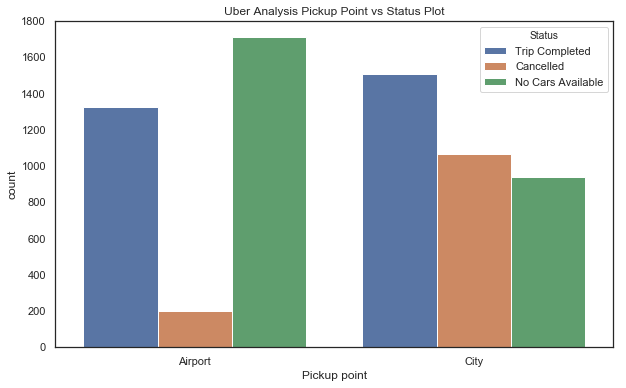

In [11]:
# loading libraries and reading the data
# Total statistics based on pickup point and corresponding status
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
plt.figure(figsize=(10
                    
                    ,6))
sns.set(style="white")
sns.countplot(x='Pickup point',hue='Status',data=uber)
plt.title("Uber Analysis Pickup Point vs Status Plot")
plt.show()


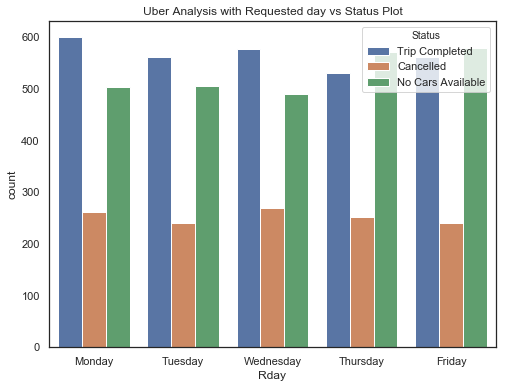

In [13]:
## Analysis per weekday
plt.figure(figsize=(8,6))
DY = sns.countplot(x='Rday',hue='Status',data=uber)
plt.title("Uber Analysis with Requested day vs Status Plot")
plt.show()

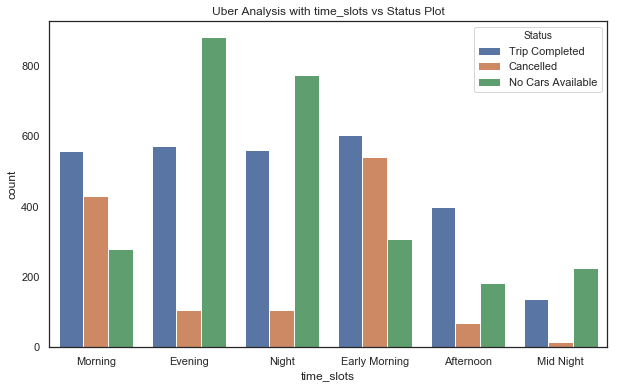

In [14]:
# Analysis per time slots with status 
plt.figure(figsize=(10,6))
TP = sns.countplot(x='time_slots',hue='Status',data=uber)
plt.title("Uber Analysis with time_slots vs Status Plot")
plt.show()


In [15]:

# Plots based on Pickup point and Status as well as Timeslots showing supply and demand
# Based on the status given, "Trip Completed" indicates Supply is positive and available and "No Cars Available" as well
# as "Cancelled" indicate that there is no supply. Adding additional column to represent the same in 1 or 0
# 1 is supply available, 0 as not available

# Creating column Demand for every request it will be 1 
uber['Demand'] = 1
#Creating Column supply by adding default value 0 and assigning trip completed with value 1
uber['Supply'] = 0
uber.loc[uber['Status'] == 'Trip Completed','Supply']  = 1
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Rday,Hours,time_slots,Demand,Supply
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,Morning,1,1
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,Evening,1,1
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9,Morning,1,1
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21,Night,1,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning,1,1
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Wednesday,21,Night,1,1
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Thursday,6,Early Morning,1,1
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Friday,5,Early Morning,1,1
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Friday,17,Evening,1,1
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Monday,6,Early Morning,1,1


In [16]:
#Finding the gap between supply and Demand for time slots where the highest gap exists 

Dem_Sup_TS = uber.groupby(['time_slots']).sum()[['Demand','Supply']]
Dem_Sup_TS


,Demand,Supply
time_slots,,
Afternoon,651,400
Early Morning,1452,604
Evening,1560,572
Mid Night,375,136
Morning,1268,559
Night,1439,560


In [17]:
#Finding the gap between supply and Demand for time slots and pickup points where the highest gap exists
Dem_Sup_PP = uber.groupby(['Pickup point','time_slots']).sum()[['Demand','Supply']]
Dem_Sup_PP

Demand  Supply
Pickup point time_slots                   
Airport      Afternoon         278     187
             Early Morning     336     277
             Evening          1140     276
             Mid Night         181      67
             Morning           301     243
             Night            1002     277
City         Afternoon         373     213
             Early Morning    1116     327
             Evening           420     296
             Mid Night         194      69
             Morning           967     316
             Night             437     283

<Figure size 1440x720 with 0 Axes>

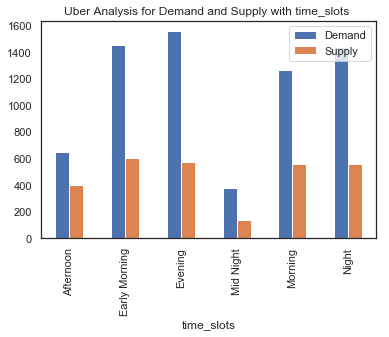

In [18]:
#Analysis for Demand and Supply with time_slots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
DS_TS = Dem_Sup_TS.plot.bar()
plt.title("Uber Analysis for Demand and Supply with time_slots ")
plt.show()

<Figure size 1440x720 with 0 Axes>

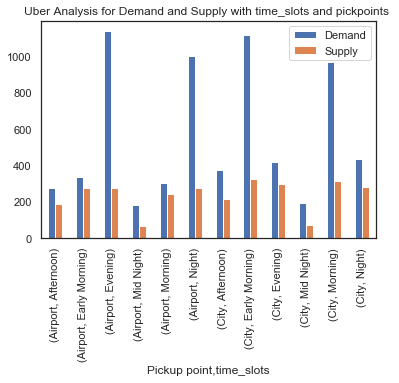

In [193]:
#Analysis for Demand and Supply with time_slots and pickpoints

plt.figure(figsize=(20,10))
DS_PP = Dem_Sup_PP.plot.bar()
plt.title("Uber Analysis for Demand and Supply with time_slots and pickpoints ")
plt.show()